## Elon Musk Tweets - Sentiment Analysis

Sentiment Analysis of Elon Musk tweets Jan 2022 - Oct 2022


Data set sourced through a Twitter API scrape. Python code source: https://www.youtube.com/watch?v=ujId4ipkBio&t=171s

Sentiment analysis is form of text analytics that uses natural language processing (NLP) and machine learning. It is sometimes referred to as 'opinion mining'. A key aspect of sentiment analysis is polarity classification. Polarity refers to the overall sentiment conveyed by a particular tweet, phrase or word. Polarity can be expressed as a simple numerical score (or rating). In this example, the score is represneted as 'below 0', 'zero', or 'above zero', with zero representing a neutral sentiment. 

In [ ]:
# pip install demoji

In [1]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
# import demoji
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

### Create a data frame to store the data

In [2]:
# Load the data set into a data frame
tweets_df = pd.read_csv('elonmusk_twitter.csv')
tweets_df.head(5)

,Datetime,Tweet Id,Text,Username,LikeCount,QuoteCount
0,2022-10-27 21:45:47+00:00,1.585750e+18,@Gfilche @Twitter 🤣,elonmusk,32,10640
1,2022-10-27 13:08:00+00:00,1.585620e+18,Dear Twitter Advertisers https://t.co/GMwHmInPAS,elonmusk,23075,746494
2,2022-10-26 21:39:32+00:00,1.585390e+18,Meeting a lot of cool people at Twitter today!,elonmusk,1677,296012
3,2022-10-26 18:45:58+00:00,1.585340e+18,Entering Twitter HQ – let that sink in! https:...,elonmusk,43528,1393186
4,2022-10-26 17:05:16+00:00,1.585320e+18,@ARodTV Definitely closer to citizen journalis...,elonmusk,115,12846


### Filter location of tweets in the data frame by a call to its location

In [3]:
tweets_df.loc[:,"Text"]

0                                    @Gfilche @Twitter 🤣
1       Dear Twitter Advertisers https://t.co/GMwHmInPAS
2         Meeting a lot of cool people at Twitter today!
3      Entering Twitter HQ – let that sink in! https:...
4      @ARodTV Definitely closer to citizen journalis...
                             ...                        
357    @WholeMarsBlog It was a mistake to try to use ...
358             Tesla FSD price rising to $12k on Jan 17
359    @ClaudioOmbrella @Tesla @slcuervo @alex_avoigt...
360                  Great work by Tesla team worldwide!
361                                    @BLKMDL3 @Tesla 🔥
Name: Text, Length: 362, dtype: object

### Clean the data to remove unecessary characters, symbols, hyperlinks ...

In [22]:
# create a function to clean tweets in the data set
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+_', '', text) # remove @mentions based on any character (raw string)
    text = re.sub(r'#', '', text) # remove the '#' symbol and replace with empty string
    text = re.sub('RT[\s]+', '', text)  # remove retweets (RT) followed by white space
    text = re.sub('https?:\/\/\S+', '', text) # remove URL hyperlinks followed by one or more white spaces
    return text
   
# apply the function and show the cleaned data 
tweets_df["Text"] = tweets_df['Text'].apply(cleanTxt)
tweets_df

,Datetime,Tweet Id,Text,Username,LikeCount,QuoteCount,Subjectivity,Polarity,Analysis
0,2022-10-27 21:45:47+00:00,1.585750e+18,@Gfilche @Twitter 🤣,elonmusk,32,10640,0.000000,0.000000,Neutral
1,2022-10-27 13:08:00+00:00,1.585620e+18,Dear Twitter Advertisers,elonmusk,23075,746494,0.000000,0.000000,Neutral
2,2022-10-26 21:39:32+00:00,1.585390e+18,Meeting a lot of cool people at Twitter today!,elonmusk,1677,296012,0.650000,0.437500,Positive
3,2022-10-26 18:45:58+00:00,1.585340e+18,Entering Twitter HQ – let that sink in!,elonmusk,43528,1393186,0.000000,0.000000,Neutral
4,2022-10-26 17:05:16+00:00,1.585320e+18,@ARodTV Definitely closer to citizen journalis...,elonmusk,115,12846,0.333333,0.166667,Positive
...,...,...,...,...,...,...,...,...,...
357,2022-01-07 23:36:11+00:00,1.479600e+18,@WholeMarsBlog It was a mistake to try to use ...,elonmusk,29,7948,0.800000,0.000000,Neutral
358,2022-01-07 23:09:17+00:00,1.479590e+18,Tesla FSD price rising to $12k on Jan 17,elonmusk,1426,72872,0.000000,0.000000,Neutral
359,2022-01-03 18:31:27+00:00,1.478070e+18,@ClaudioOmbrella @Tesla @slcuervo avoigt @Club...,elonmusk,25,4210,0.000000,0.000000,Neutral
360,2022-01-02 17:56:50+00:00,1.477700e+18,Great work by Tesla team worldwide!,elonmusk,311,63964,0.750000,1.000000,Positive


### Create two separate functions to check the subjectivity and polarity of the text in a given tweet. Subjectivity is our proxy for 'opinionated' text, while polarity is a simple measure of the positivity or negativty of the tweet. 

In [6]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

### Next, create two columns in the data frame to store the subjectivity and polarity data

In [7]:
tweets_df['Subjectivity'] = tweets_df["Text"].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df["Text"].apply(getPolarity)
tweets_df
# tweets_df.loc[:,"Text", ["Subjectivity","Polarity"]]

,Datetime,Tweet Id,Text,Username,LikeCount,QuoteCount,Subjectivity,Polarity
0,2022-10-27 21:45:47+00:00,1.585750e+18,@Gfilche @Twitter 🤣,elonmusk,32,10640,0.000000,0.000000
1,2022-10-27 13:08:00+00:00,1.585620e+18,Dear Twitter Advertisers,elonmusk,23075,746494,0.000000,0.000000
2,2022-10-26 21:39:32+00:00,1.585390e+18,Meeting a lot of cool people at Twitter today!,elonmusk,1677,296012,0.650000,0.437500
3,2022-10-26 18:45:58+00:00,1.585340e+18,Entering Twitter HQ – let that sink in!,elonmusk,43528,1393186,0.000000,0.000000
4,2022-10-26 17:05:16+00:00,1.585320e+18,@ARodTV Definitely closer to citizen journalis...,elonmusk,115,12846,0.333333,0.166667
...,...,...,...,...,...,...,...,...
357,2022-01-07 23:36:11+00:00,1.479600e+18,@WholeMarsBlog It was a mistake to try to use ...,elonmusk,29,7948,0.800000,0.000000
358,2022-01-07 23:09:17+00:00,1.479590e+18,Tesla FSD price rising to $12k on Jan 17,elonmusk,1426,72872,0.000000,0.000000
359,2022-01-03 18:31:27+00:00,1.478070e+18,@ClaudioOmbrella @Tesla @slcuervo avoigt @Club...,elonmusk,25,4210,0.000000,0.000000
360,2022-01-02 17:56:50+00:00,1.477700e+18,Great work by Tesla team worldwide!,elonmusk,311,63964,0.750000,1.000000


### Plot a wordcloud to see how well the sentiments are distributed. the cloud image will also provide a simple visualisation of  words and terms that are common across tweets

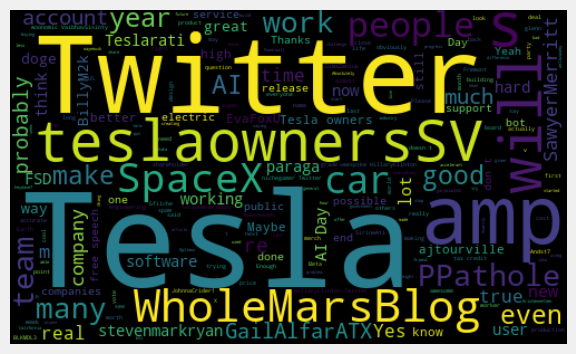

In [8]:
allWords = ' '.join(tweets_df.iloc[:,2])
wordCloud = WordCloud(width=500, height=300, random_state = 21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Create a function to compute simple negative, neutral and positive scores for the sentiment analysis. Scores are based on a simple median of zero. String values ar retuned on the basis of the score value. Last, create a new column called 'Analysis'

In [18]:
# create function to compute negative, positive an neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# show the new dataframe
tweets_df['Analysis'] = tweets_df['Polarity'].apply(getAnalysis)
tweets_df

,Datetime,Tweet Id,Text,Username,LikeCount,QuoteCount,Subjectivity,Polarity,Analysis
0,2022-10-27 21:45:47+00:00,1.585750e+18,@Gfilche @Twitter 🤣,elonmusk,32,10640,0.000000,0.000000,Neutral
1,2022-10-27 13:08:00+00:00,1.585620e+18,Dear Twitter Advertisers,elonmusk,23075,746494,0.000000,0.000000,Neutral
2,2022-10-26 21:39:32+00:00,1.585390e+18,Meeting a lot of cool people at Twitter today!,elonmusk,1677,296012,0.650000,0.437500,Positive
3,2022-10-26 18:45:58+00:00,1.585340e+18,Entering Twitter HQ – let that sink in!,elonmusk,43528,1393186,0.000000,0.000000,Neutral
4,2022-10-26 17:05:16+00:00,1.585320e+18,@ARodTV Definitely closer to citizen journalis...,elonmusk,115,12846,0.333333,0.166667,Positive
...,...,...,...,...,...,...,...,...,...
357,2022-01-07 23:36:11+00:00,1.479600e+18,@WholeMarsBlog It was a mistake to try to use ...,elonmusk,29,7948,0.800000,0.000000,Neutral
358,2022-01-07 23:09:17+00:00,1.479590e+18,Tesla FSD price rising to $12k on Jan 17,elonmusk,1426,72872,0.000000,0.000000,Neutral
359,2022-01-03 18:31:27+00:00,1.478070e+18,@ClaudioOmbrella @Tesla @slcuervo avoigt @Club...,elonmusk,25,4210,0.000000,0.000000,Neutral
360,2022-01-02 17:56:50+00:00,1.477700e+18,Great work by Tesla team worldwide!,elonmusk,311,63964,0.750000,1.000000,Positive


### Split the data frame to show only the relevant columns

In [20]:
dfNew = tweets_df[['Text','Subjectivity','Polarity', 'Analysis']]
dfNew.head(10)

,Text,Subjectivity,Polarity,Analysis
0,@Gfilche @Twitter 🤣,0.000000,0.000000,Neutral
1,Dear Twitter Advertisers,0.000000,0.000000,Neutral
2,Meeting a lot of cool people at Twitter today!,0.650000,0.437500,Positive
3,Entering Twitter HQ – let that sink in!,0.000000,0.000000,Neutral
4,@ARodTV Definitely closer to citizen journalis...,0.333333,0.166667,Positive
5,A beautiful thing about Twitter is how it empo...,0.812500,0.675000,Positive
6,@PPathole @Twitter Yes!,0.000000,0.000000,Neutral
7,@SwipeWright Twitter should be as broadly incl...,0.685417,-0.000189,Negative
8,@MarcusHouse @LordofEa @kerrikgray glenn @Tesl...,0.327273,0.168182,Positive
9,@LordofEa @kerrikgray glenn @Tesla @teslaowner...,0.900000,0.250000,Positive


### Sort and print all tweets marked 'positive'

In [10]:
# print all the positive tweets
j = 1
sortedDF = tweets_df.sort_values(by=['Polarity'])

# for all rows in the data, sort tweets 
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(j)
        print(sortedDF['Text'][i])
        j = j+1

1
Meeting a lot of cool people at Twitter today!
2
@ARodTV Definitely closer to citizen journalism – local news orgs are under-appreciated &amp; should get way more prominence on Twitter
3
A beautiful thing about Twitter is how it empowers citizen journalism – people are able to disseminate news without an establishment bias
4
@MarcusHouse @LordofEa @kerrikgray glenn @Tesla @teslaownersSV @dvorahfr @TonyadeVitti @SpaceX @SirineAti That’s the plan, unless it is damaged in testing. What really matters is that ship &amp; booster production line is spooling up. Also, each new ship &amp; booster has incremental design improvements.
5
@LordofEa @kerrikgray glenn @Tesla @teslaownersSV @dvorahfr @TonyadeVitti @SpaceX @SirineAti Absolutely!
6
@teslaownersSV @BillyM2k Varies a lot. Tesla &amp; SpaceX are in good positions, but many other companies are not. 

Recessions do have a silver lining in that companies that shouldn’t exist stop existing.
7
@TeslaAIBot @SpaceX @Tesla Thanks Optimus :)
8
@

### Sort and print all  tweets marked negative

In [21]:
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'], ascending=False)
sortedDF = sortedDF.reset_index(drop=True)

# # for all rows in the data, sort and print the negative tweets
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(j)
        print(sortedDF['Text'][i])
        j = j+1

1
@SwipeWright Twitter should be as broadly inclusive as possible, serving as a fair forum for lively, even if occasionally rancorous, debate between widely divergent beliefs.
2
@TeslaOwnersEBay @GailAlfarATX @Tesla @EvaFoxU Aiai @DBurkland ian @Lstad78 @1stMarsColonist @JosephVVallace @dubbleotrippleo No, I meant wide release to high safety score beta participants. Going to all beta participants is expected later this year.
3
@SamTwits My true moral error was creating Tesla &amp; SpaceX at same time, while avoiding general mgmt chores at Tesla (focusing only on product &amp; engineering). Tried to have my cake &amp; eat it too, which failed.
4
@WholeMarsBlog The probability of Tesla dying in 2008/2009 was very high. We closed our financing round at 6pm on Dec 24th – the last working hour of the last day before Tesla would otherwise bounce payroll.
5
To be clear, I’m spending &lt;5% (but actually) of my time on the Twitter acquisition. It ain’t rocket science!

Yesterday was Giga Texas

## Create a scatter plot of sentiments by 'subjectivity' and 'polarity'

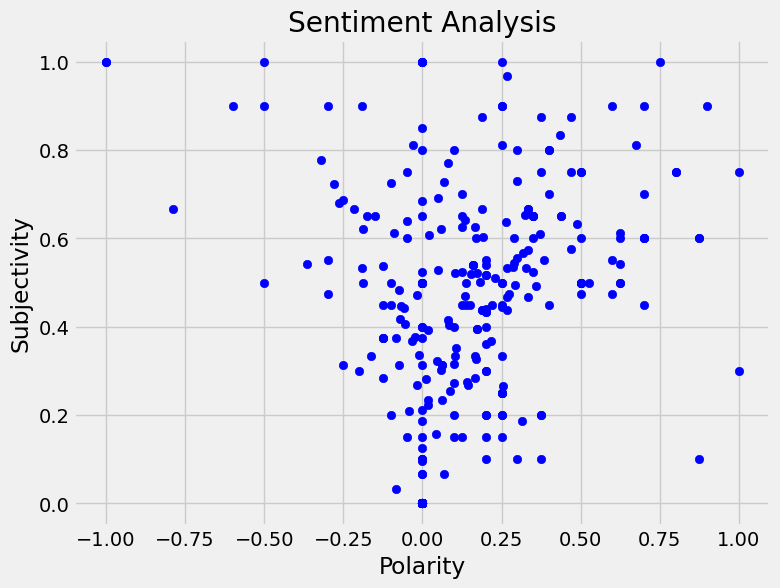

In [26]:
# Plot the polarity and subjectvitiy
plt.figure(figsize=(8,6))
for i in range (0, tweets_df.shape[0]):
    plt.scatter(dfNew['Polarity'][i], dfNew['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

There's a reasonable spread around the middle (neutral) position. As most of the data points lie to the right of the neutral position, does this suggest a more 'positive' sentiment toward Elon Musk tweets over the timeframe? 

### Check the percentage of positive, neutral and negative tweets in the data set

In [13]:
# Get the percentage of positive tweets in the data set
ptweets = tweets_df[tweets_df.Analysis == 'Positive']
ptweets = ptweets['Text']
pos = round( (ptweets.shape[0] / tweets_df.shape[0]) *100, 1)
print("{}% positive sentiment".format(pos))

48.9% positive sentiment


In [14]:
# Get the percentage of negative tweets in the data set
ntweets = tweets_df[tweets_df.Analysis == 'Negative']
ntweets = ntweets['Text']
neg = round( (ntweets.shape[0] / tweets_df.shape[0]) *100, 1)
print("{}% negative sentiment".format(neg))

15.5% negative sentiment


In [15]:
# Get the percentage of neutral tweets in the data set
ntweets = tweets_df[tweets_df.Analysis == 'Neutral']
ntweets = ntweets['Text']
ntr = round( (ntweets.shape[0] / tweets_df.shape[0]) *100, 1)
print("{}% neutral sentiment".format(ntr))

35.6% neutral sentiment


### Create a bar chart of tweet sentiments 

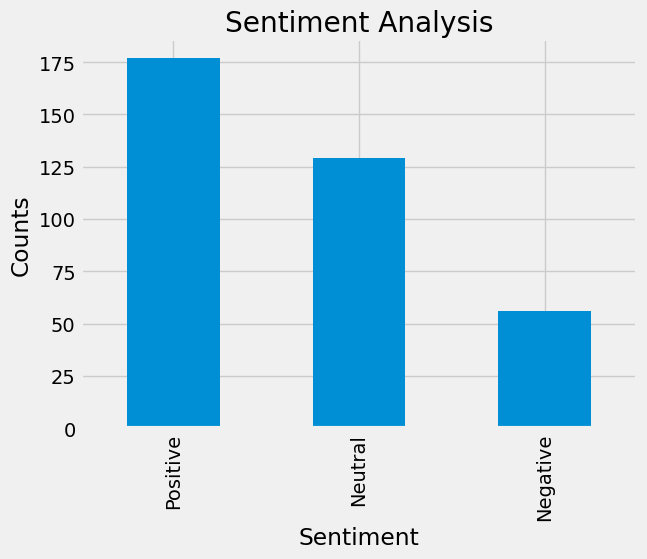

In [16]:
# show the value counts
tweets_df['Analysis'].value_counts()

# plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind='bar')
plt.show()